In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif


In [3]:
# 1. Análisis Exploratorio de Datos (EDA)

In [5]:
# Cargar los datos
df = pd.read_csv('winequality-red.csv')

In [9]:
# Resumen estadístico de las variables numéricas
print(df.describe())

print("\nDistribución de la variable de salida (calidad):")
print(df['quality'].value_counts())

Resumen de los datos:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

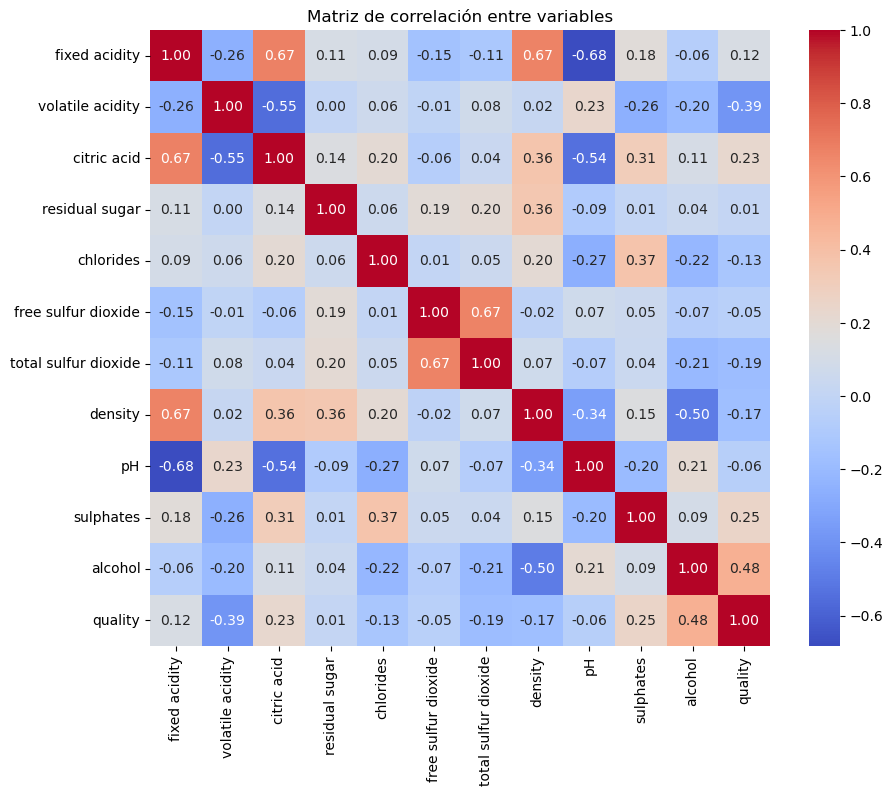

In [11]:
# Correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

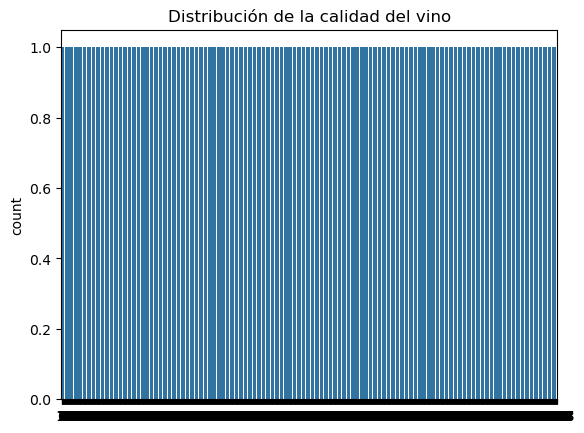

In [13]:
# Visualización de la distribución de la variable de salida
sns.countplot(df['quality'])
plt.title('Distribución de la calidad del vino')
plt.show()

In [15]:
# 2. Preprocesamiento de los datos

In [19]:
# Verificar valores faltantes
print("Valores faltantes en el dataset:")
print(df.isnull().sum())

Valores faltantes en el dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [23]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('quality', axis=1)
y = df['quality']

X_scaled = scaler.fit_transform(X)


In [25]:
# 3. Selección de características
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, y)


In [27]:
# Verificar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print(f"Características seleccionadas: {selected_features}")

Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


In [29]:
# 4. División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [31]:
# 5. Entrenamiento del modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.65      0.64       130
           6       0.56      0.52      0.54       132
           7       0.46      0.50      0.48        42
           8       0.20      0.20      0.20         5

    accuracy                           0.55       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.55      0.55      0.55       320

Matriz de confusión:


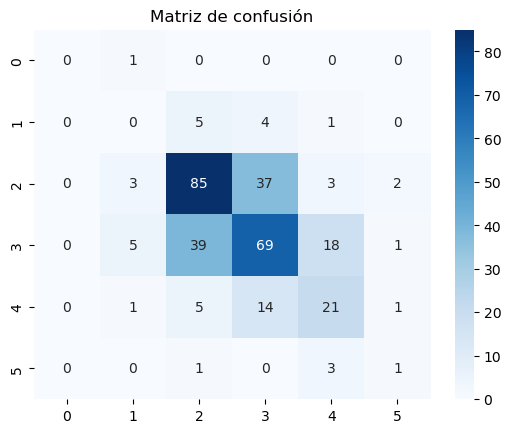

Precisión del modelo: 0.55


In [47]:
# Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de confusión')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

In [39]:
# 7. Visualización de resultados

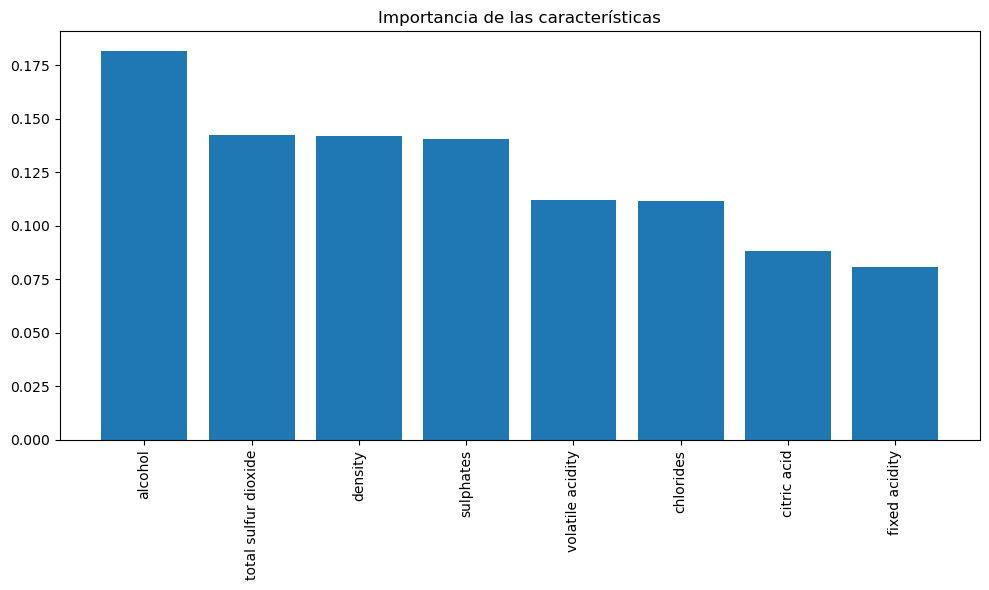

In [49]:
# Importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), selected_features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# 8. Interpretación y documentación

In [51]:
print(f"Las características más importantes son: {selected_features[indices[:3]]}")
print(f"El modelo obtuvo una precisión del {accuracy * 100:.2f}% al predecir la calidad del vino tinto.")

Las características más importantes son: Index(['alcohol', 'total sulfur dioxide', 'density'], dtype='object')
El modelo obtuvo una precisión del 55.00% al predecir la calidad del vino tinto.
